## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file
df = pd.read_csv('datasets/office_episodes.csv')
print(df.shape)
df.head(3)

(188, 14)


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500


# First Step:

In [2]:
# We need to create a scatter plot. The x-axis is episode number. The viewship (in millions) is y-axis
x_axis = df['episode_number']
y_axis = df['viewership_mil']

# A color scheme reflecting the scaled ratings
def color_change(score):
    if score < 0.25:
        return 'red'
    elif 0.25 <= score < 0.5:
        return 'orange'
    elif 0.5 <= score < 0.75:
        return 'lightgreen'
    else:
        return 'darkgreen'
color_scheme = df['scaled_ratings'].apply(color_change)

# size system, with guest appearances -> size equal to 250. Otherwise, 25
def mark_size(guest):
    if guest is True:
        return 250
    return 25
size_system = df['has_guests'].apply(mark_size)

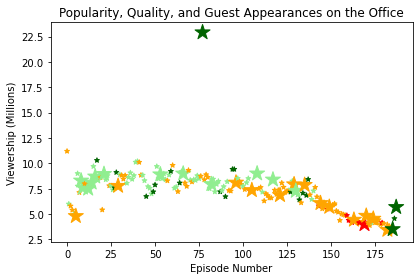

In [3]:
# initalize the matplotlib.pyplot fig
fig = plt.figure()

# Create the scatter plot
plt.scatter(x_axis, y_axis, c=color_scheme, s=size_system, marker='*')

# Plot with title 'Popularity, Quality, and Guest Appearances on the Office'
plt.title('Popularity, Quality, and Guest Appearances on the Office')

# Plot with xlabel "Episode Number"
plt.xlabel("Episode Number")

# plot with ylabel "Viewership (Millions)"
plt.ylabel('Viewership (Millions)')

# Setting the plot to become bigger
plt.rcParams['figure.figsize'] = [11, 7]

# Second Step:

In [4]:
# Select the rows which has_guests equal to True
df = df[df['has_guests'] == True]

# Using groupby function to aggreviate the guest_stars and calculate the sum of viewership
df = df.groupby(df['guest_stars']).sum()

In [5]:
# Select the viewship_mil column
guest_viewership = df['viewership_mil']

# Check the maximum value
max_view = max(np.array(guest_viewership))

# select the name which viewership equal to 22.91
popular_guest = guest_viewership[guest_viewership == 22.91]
top_star = popular_guest.index[0].split(',')[0]
top_star

'Cloris Leachman'